# Project - part 1

## Show the data information, e.g., types of attributes, the attributes values etc

### Import and style settings

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as pca

In [144]:
# for inline plots in jupyter
%matplotlib inline 

In [145]:
sns.set(color_codes=True) # settings for seaborn plotting style
sns.set(rc={'figure.figsize':(5,5)}) # settings for seaborn plot sizes

In [146]:
df = pd.read_csv("Marketing_Campaign_Train.csv")


In [147]:
print("Shape: ", df.shape)
df.head()

Shape:  (1680, 29)


,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response
0,5376,1979.0,Graduation,Married,NaN,1.0,0.0,06/01/2013,42,1.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0
1,6862,1971.0,Graduation,Divorced,1730.0,0.0,0.0,18/05/2014,65,1.0,...,40.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0
2,10749,1991.0,Graduation,Single,8028.0,0.0,0.0,18/09/2012,62,73.0,...,38.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0
3,238,1967.0,2n Cycle,Together,67309.0,1.0,1.0,23/01/2013,76,515.0,...,14.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0
4,1501,1982.0,PhD,Married,160803.0,0.0,0.0,04/08/2012,21,55.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0


In [148]:
df.replace('unknown',np.nan,inplace = True) # maybe to remove -unneccery

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1680 non-null   int64  
 1   Year_Birth             1651 non-null   float64
 2   Education              1672 non-null   object 
 3   Status                 1646 non-null   object 
 4   Income                 1609 non-null   float64
 5   Num_of_kids            1672 non-null   float64
 6   Num_of_Teen            1660 non-null   float64
 7   Registration_date      1680 non-null   object 
 8   Recency                1680 non-null   int64  
 9   Mnt_Fruits             1673 non-null   float64
 10  Mnt_Meat               1673 non-null   float64
 11  Mnt_sweet              1659 non-null   float64
 12  Mnt_Wines              1673 non-null   float64
 13  Mnt_Gold_Products      1673 non-null   float64
 14  Mnt_Fish               1673 non-null   float64
 15  Num_

# To see for how many rows thare are missing feature

In [150]:
df['Age'] = 2022 - df['Year_Birth'] # add column for convient of the Age
df['Age']

0       43.0
1       51.0
2       31.0
3       55.0
4       40.0
        ... 
1675    32.0
1676    66.0
1677    60.0
1678    45.0
1679    66.0
Name: Age, Length: 1680, dtype: float64

## Show the data statistics, e.g., distribution, skewness, median and more.

In [151]:
df.describe(include='all')

,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response,Age
count,1680.000000,1651.000000,1672,1646,1609.000000,1672.000000,1660.000000,1680,1680.000000,1673.000000,...,1662.000000,1673.000000,1673.000000,1673.000000,1673.000000,1673.000000,1673.0,1673.0,1680.000000,1651.000000
unique,NaN,NaN,5,6,NaN,NaN,NaN,634,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,14/02/2013,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,830,653,NaN,NaN,NaN,10,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5584.735714,1969.047244,NaN,NaN,51983.554382,0.454545,0.503614,NaN,48.890476,303.676031,...,0.076414,0.071727,0.072325,0.065152,0.013748,0.008966,3.0,11.0,0.148214,52.952756
std,3233.716033,11.937421,NaN,NaN,26567.679664,0.538492,0.544011,NaN,29.091872,340.672889,...,0.265739,0.258113,0.259103,0.246868,0.116477,0.094291,0.0,0.0,0.355418,11.937421
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,26.000000
25%,2862.500000,1959.500000,NaN,NaN,34596.000000,0.000000,0.000000,NaN,24.000000,23.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,44.000000
50%,5511.000000,1970.000000,NaN,NaN,50611.000000,0.000000,0.000000,NaN,50.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,52.000000
75%,8395.500000,1978.000000,NaN,NaN,67716.000000,1.000000,1.000000,NaN,74.000000,508.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,62.500000


## גיליתי בשלב הנקיון שיש 7 רשומות שמפריעות לי אז חזרתי למעלה לנקות אותם פה


In [152]:
df[df.isnull().sum(axis=1)>7]

,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response,Age
1659,1419,1950.0,Graduation,Together,34026.0,1.0,1.0,05/08/2013,11,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,72.0
1662,9284,1958.0,Graduation,Together,53977.0,0.0,1.0,08/06/2013,21,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,64.0
1663,3673,1971.0,Graduation,Single,55239.0,0.0,1.0,14/07/2013,59,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,51.0
1665,10983,1952.0,Graduation,Together,75278.0,0.0,0.0,29/01/2013,17,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,70.0
1666,2611,1959.0,Master,Together,82576.0,0.0,0.0,01/08/2012,66,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,63.0
1673,979,1975.0,Graduation,Single,33249.0,1.0,0.0,20/02/2013,11,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,47.0
1675,8278,1990.0,PhD,Married,74214.0,0.0,0.0,26/08/2012,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,32.0


In [153]:
df=df.drop(df.index[df.isnull().sum(axis=1)>7])

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1673 entries, 0 to 1679
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1673 non-null   int64  
 1   Year_Birth             1644 non-null   float64
 2   Education              1665 non-null   object 
 3   Status                 1639 non-null   object 
 4   Income                 1602 non-null   float64
 5   Num_of_kids            1665 non-null   float64
 6   Num_of_Teen            1653 non-null   float64
 7   Registration_date      1673 non-null   object 
 8   Recency                1673 non-null   int64  
 9   Mnt_Fruits             1673 non-null   float64
 10  Mnt_Meat               1673 non-null   float64
 11  Mnt_sweet              1659 non-null   float64
 12  Mnt_Wines              1673 non-null   float64
 13  Mnt_Gold_Products      1673 non-null   float64
 14  Mnt_Fish               1673 non-null   float64
 15  Num_

In [155]:
target = pd.DataFrame(df['Response']) # line 29 is the target
data = df.drop(['ID','Response'], axis = 1)


In [156]:
numeric_col = data.describe().columns # to get the numeric column
numeric_col

Index(['Year_Birth', 'Income', 'Num_of_kids', 'Num_of_Teen', 'Recency',
       'Mnt_Fruits', 'Mnt_Meat', 'Mnt_sweet', 'Mnt_Wines', 'Mnt_Gold_Products',
       'Mnt_Fish', 'Num_Web_Purchases', 'Num_Store_Purchases',
       'Num_Deals_Purchases', 'Num_Catalog_Purchases', 'Num_Web_Visits',
       'Response_Campaign_1', 'Response_Campaign_2', 'Response_Campaign_3',
       'Response_Campaign_4', 'Response_Campaign_5', 'Complain',
       'Cost_Contact', 'Revenue', 'Age'],
      dtype='object')

## התגובות לקמפןיין נספרו ביחד עם כל המידע המספרי. שזה בעצם נומיל1
ולא רצינו שזה יהיו בנומרי כי זה ערך יותר קטרוגאלי בינארי ולכן מידע אחד זה כמו שהוא.
מידע שני2 זה שלקחנו למידע הנומילי הקטורגלי את התגובות לקמפןיין

In [157]:
numeric_data = data[numeric_col] # numeric data
nominal_data = data.drop(numeric_col, axis=1) # nominal data

nominal_data1 = data.drop(numeric_col, axis=1) # nominal data - origin  
nominal_data2 = nominal_data #'wil be the nominal + the answer to campain 1-5'

nominal_data2['Response_Campaign_5'] = data['Response_Campaign_5']
nominal_data2['Response_Campaign_4'] = data['Response_Campaign_4']
nominal_data2['Response_Campaign_3'] = data['Response_Campaign_3']
nominal_data2['Response_Campaign_2'] = data['Response_Campaign_2']
nominal_data2['Response_Campaign_1'] = data['Response_Campaign_1']
nominal_data2['Num_of_kids'] = data['Num_of_kids']
nominal_data2['Num_of_Teen'] = data['Num_of_Teen']

nominal_data1
nominal_data2


,Education,Status,Registration_date,Response_Campaign_5,Response_Campaign_4,Response_Campaign_3,Response_Campaign_2,Response_Campaign_1,Num_of_kids,Num_of_Teen
0,Graduation,Married,06/01/2013,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Graduation,Divorced,18/05/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Graduation,Single,18/09/2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2n Cycle,Together,23/01/2013,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,PhD,Married,04/08/2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1674,Graduation,Married,29/12/2013,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1676,Master,Together,06/03/2013,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1677,PhD,Together,20/07/2013,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1678,Graduation,Single,21/03/2014,0.0,0.0,0.0,0.0,1.0,0.0,1.0


c:\users\matane\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


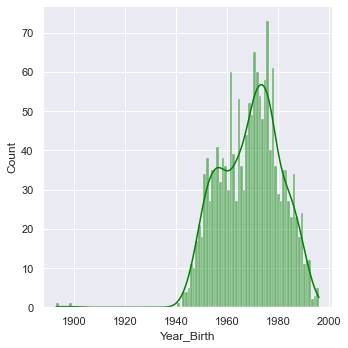

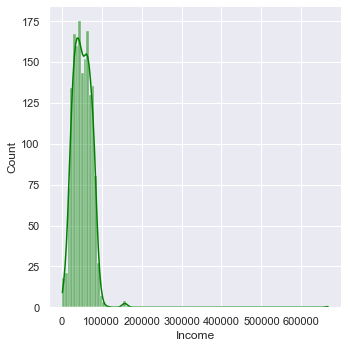

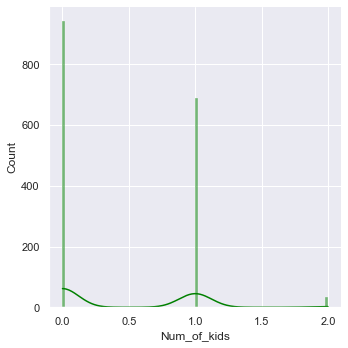

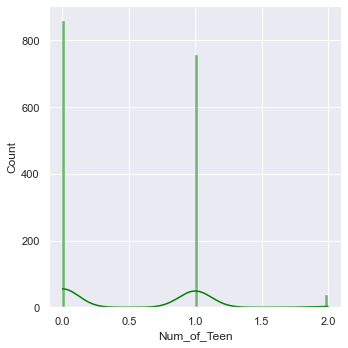

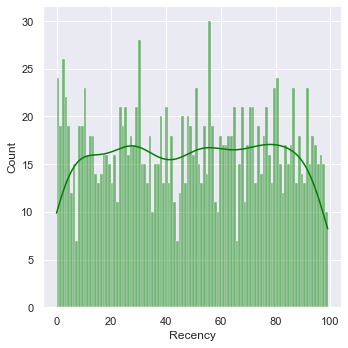

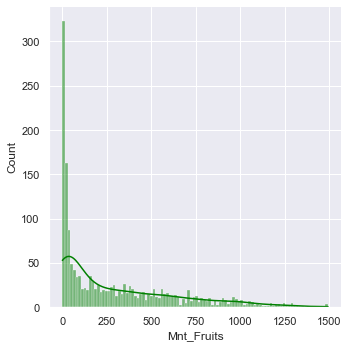

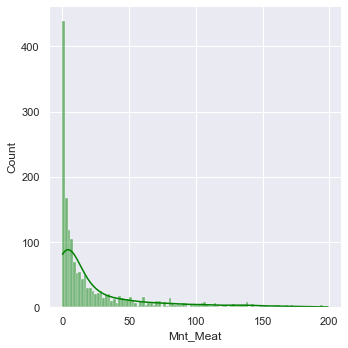

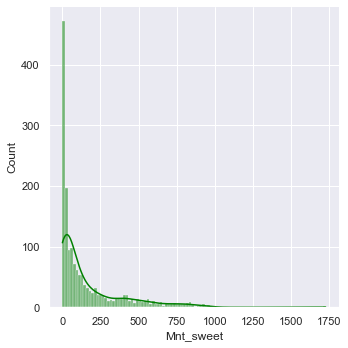

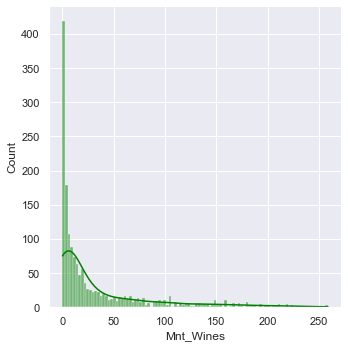

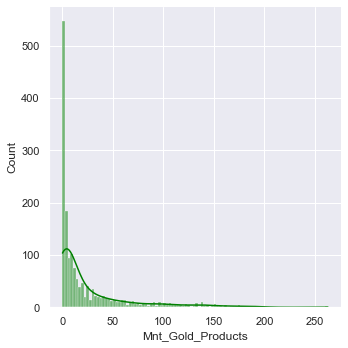

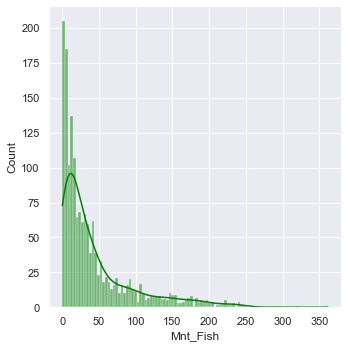

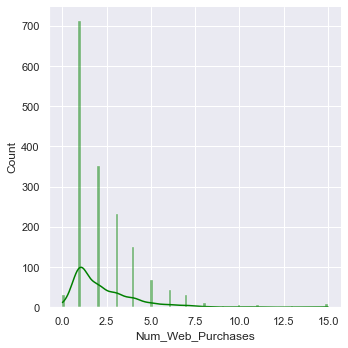

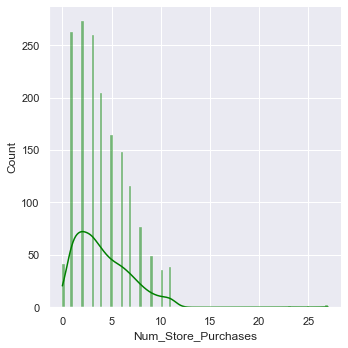

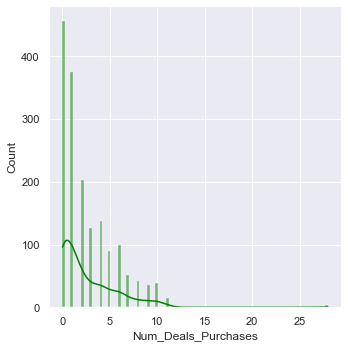

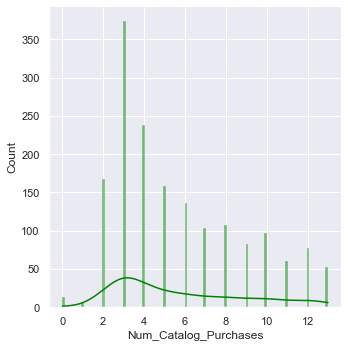

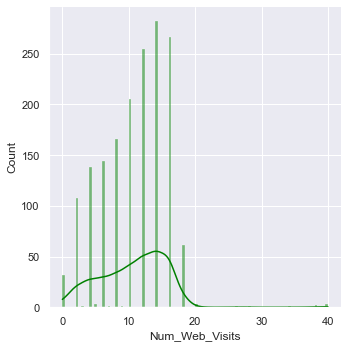

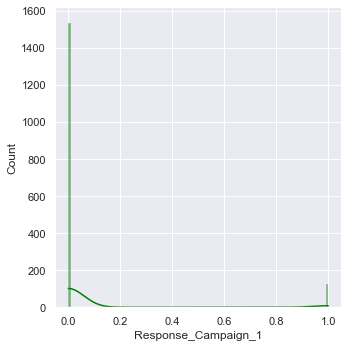

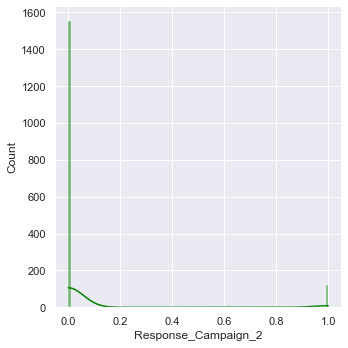

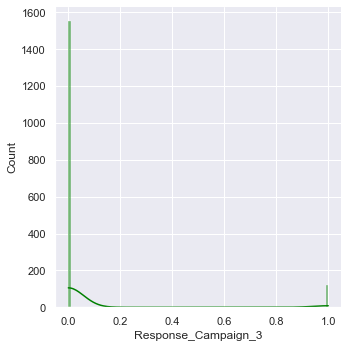

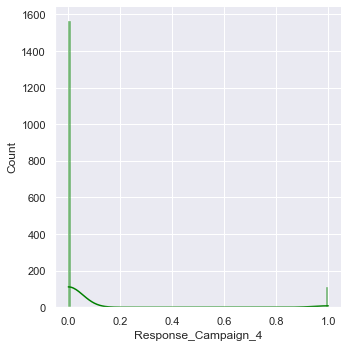

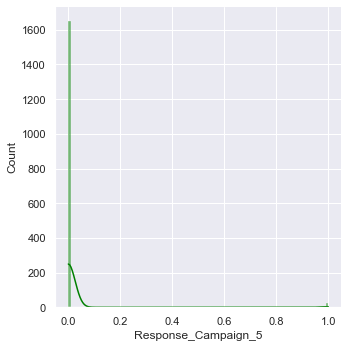

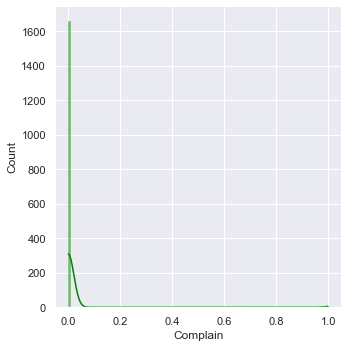

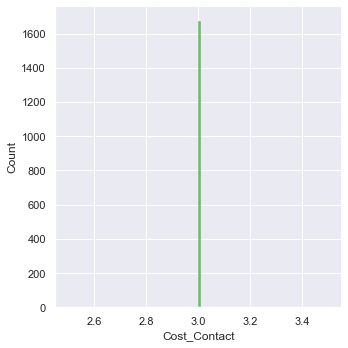

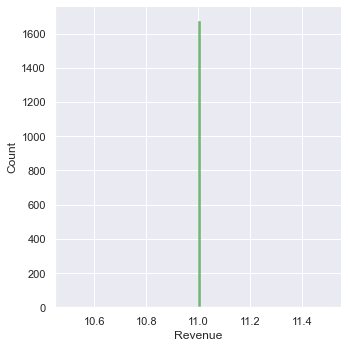

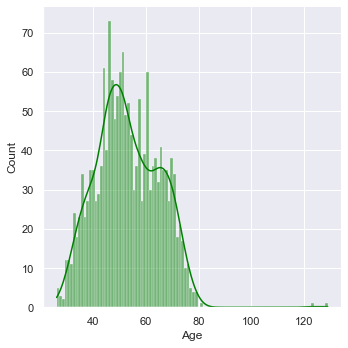

In [158]:
for col in numeric_col:
    out_fig = "output_" + str(col)
    sns.displot(numeric_data[col], bins=100, kde=True, color='green').savefig(out_fig)# kde=True

In [159]:
for col in numeric_col:
    print(col, ' skewness:', numeric_data[col].skew(axis = 0, skipna = True) )

Year_Birth  skewness: -0.3570560299294453
Income  skewness: 7.92931885290212
Num_of_kids  skewness: 0.5824618563639308
Num_of_Teen  skewness: 0.41312651801701283
Recency  skewness: -0.01572417501512122
Mnt_Fruits  skewness: 1.1829109635956951
Mnt_Meat  skewness: 2.149518442967082
Mnt_sweet  skewness: 2.1092143754162325
Mnt_Wines  skewness: 1.988342728206097
Mnt_Gold_Products  skewness: 2.218833414968302
Mnt_Fish  skewness: 1.940248617323809
Num_Web_Purchases  skewness: 2.5125546694750898
Num_Store_Purchases  skewness: 1.5552728492914274
Num_Deals_Purchases  skewness: 2.0657617307381697
Num_Catalog_Purchases  skewness: 0.6997937661170337
Num_Web_Visits  skewness: 0.25966407514401624
Response_Campaign_1  skewness: 3.191823311903448
Response_Campaign_2  skewness: 3.3224579772122724
Response_Campaign_3  skewness: 3.305146751217529
Response_Campaign_4  skewness: 3.5271264290087347
Response_Campaign_5  skewness: 8.359327109203889
Complain  skewness: 10.427719201596044
Cost_Contact  skewness:

## We can also look at the probability

In [160]:
# for col in numeric_col:
#     sns.displot(numeric_data[col], kde=True, color='skyblue', stat="probability", discrete=True )

### Categorial attributes


In [161]:
# g = sns.FacetGrid(df, col='Response')
# g.map(plt.hist, 'Age', bins=50)
# print("Mean age of Response = False: "+str(df.loc[df['Response']==False,'Age'].mean()))
# print("Mean age of Response = True: "+ str(df.loc[df['Response']==True,'Age'].mean()))
# print("Median age of Response = False: "+str(df.loc[df['Response']==False,'Age'].median()))
# print("Median age of Response = True: "+ str(df.loc[df['Response']==True,'Age'].median()))

### Nominal data

we would like to know how many unique values there are and the distribution.

In [162]:
nominal_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1673 entries, 0 to 1679
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            1665 non-null   object 
 1   Status               1639 non-null   object 
 2   Registration_date    1673 non-null   object 
 3   Response_Campaign_5  1673 non-null   float64
 4   Response_Campaign_4  1673 non-null   float64
 5   Response_Campaign_3  1673 non-null   float64
 6   Response_Campaign_2  1673 non-null   float64
 7   Response_Campaign_1  1662 non-null   float64
 8   Num_of_kids          1665 non-null   float64
 9   Num_of_Teen          1653 non-null   float64
dtypes: float64(7), object(3)
memory usage: 124.2+ KB


In [163]:
describe_df = nominal_data1.describe()
describe_df.loc['%freq of top value'] = describe_df.apply(lambda x: np.round(x.loc['freq']/1680, decimals=3))
describe_df

,Education,Status,Registration_date
count,1665,1639,1673
unique,5,6,633
top,Graduation,Married,14/02/2013
freq,825,652,10
%freq of top value,0.491,0.388,0.006


##### Visualization of the nominal data

In [164]:
dist_col=['Response_Campaign_5','Response_Campaign_4','Response_Campaign_3','Response_Campaign_2','Response_Campaign_1']
for col in dist_col:
    nominal_data[col]=nominal_data[col].replace({True: "True",False: "False"})


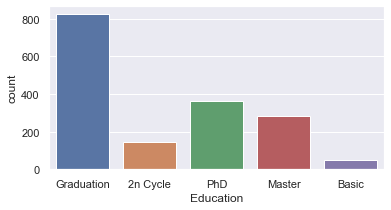

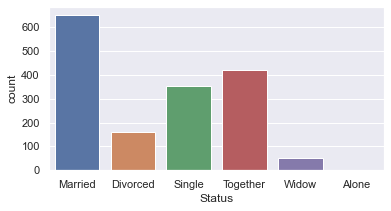

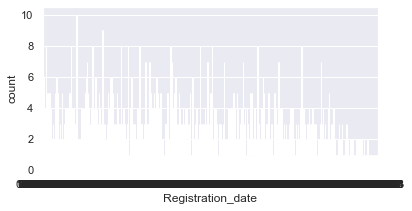

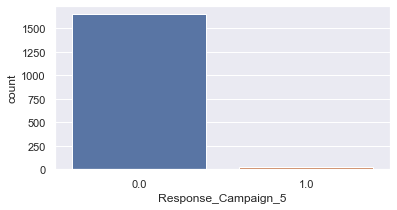

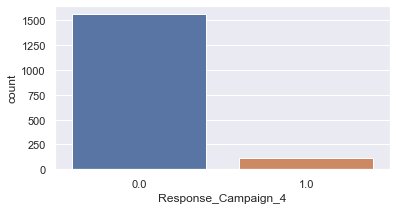

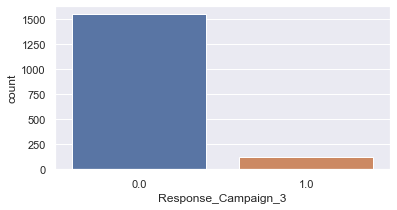

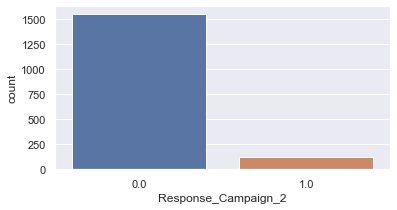

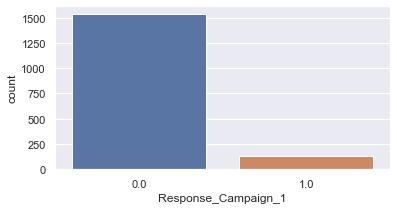

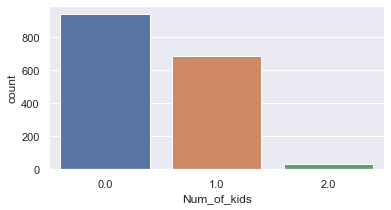

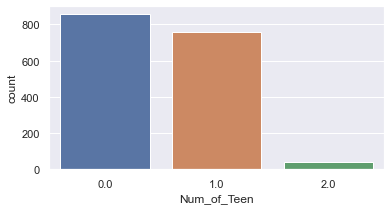

In [165]:
for col in nominal_data2.columns:
    plt.figure(figsize=(6,3))
    sns.countplot(x=col,data=df)

## BOXPLOT

<AxesSubplot:ylabel='Income'>

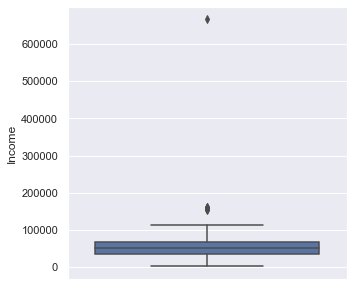

In [166]:
sns.boxplot(y="Income", data=df)

In [167]:
df[df['Income']>600000]

,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response,Age
276,9432,1977.0,Graduation,Together,666666.0,1.0,0.0,02/06/2013,23,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,45.0


In [168]:
# get out the rich man 
df=df.drop(df.index[df['Income']>600000])

In [169]:
income_under_150k = numeric_data[numeric_data['Income']<=150000]['Income']

In [170]:
income_under_150k.mean()

51171.08275862069

<AxesSubplot:ylabel='Income'>

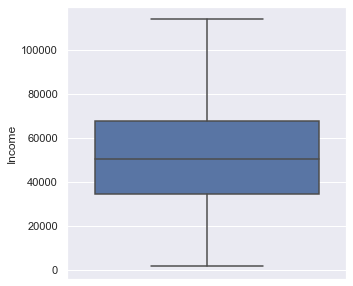

In [171]:
sns.boxplot(y=income_under_150k)

##### Scatter Plot -

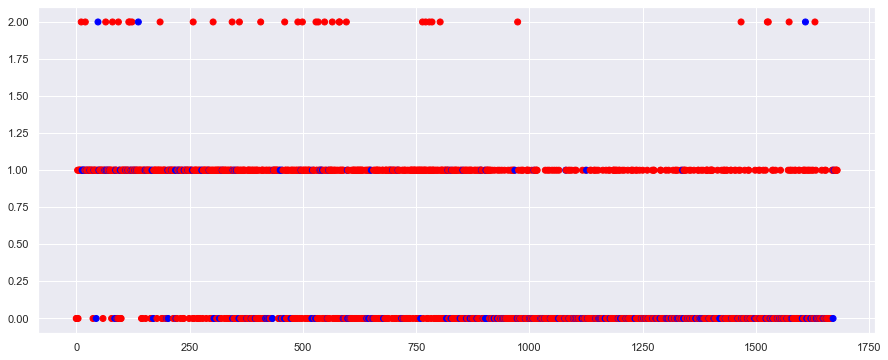

In [172]:
colordict = {0: 'red', 1: 'blue'}

plt.figure(figsize=(15, 6))
plt.scatter(df.index, df['Num_of_Teen'], c = df['Response'].map(colordict))

### 2. Filling missing values by exploring correlations. 

In [173]:
df['Education_cat'] = df['Education'].astype('category').cat.codes
df['Status_cat'] = df['Status'].astype('category').cat.codes

In [174]:
df.groupby(['Status','Status_cat']).size()

Status    Status_cat
Alone     0               2
Divorced  1             159
Married   2             652
Single    3             354
Together  4             419
Widow     5              52
dtype: int64

In [175]:
df.corr(method = 'pearson')

,ID,Year_Birth,Income,Num_of_kids,Num_of_Teen,Recency,Mnt_Fruits,Mnt_Meat,Mnt_sweet,Mnt_Wines,...,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response,Age,Education_cat,Status_cat
ID,1.000000,0.005209,-0.015321,0.003658,-0.006898,-0.037373,-0.035973,0.003436,-0.011314,-0.021650,...,-0.030905,-0.029495,-0.025539,0.015076,NaN,NaN,-0.033670,-0.005209,0.006520,0.042330
Year_Birth,0.005209,1.000000,-0.195670,0.228264,-0.380411,-0.018050,-0.153952,-0.017492,-0.016077,-0.029931,...,-0.007698,-0.011661,-0.007980,-0.029990,NaN,NaN,0.010827,-1.000000,-0.180190,-0.034397
Income,-0.015321,-0.195670,1.000000,-0.505610,0.054554,0.011343,0.687458,0.495760,0.713539,0.505740,...,0.389117,0.313711,0.104252,-0.008693,NaN,NaN,0.158215,0.195670,0.141647,0.022970
Num_of_kids,0.003658,0.228264,-0.505610,1.000000,-0.035476,0.021261,-0.490813,-0.372635,-0.433497,-0.379154,...,-0.200986,-0.163664,-0.080891,0.013885,NaN,NaN,-0.074644,-0.228264,-0.040469,-0.005487
Num_of_Teen,-0.006898,-0.380411,0.054554,-0.035476,1.000000,0.023172,0.033669,-0.163562,-0.256580,-0.187918,...,-0.176461,-0.114590,0.003823,0.028579,NaN,NaN,-0.146562,0.380411,0.125011,-0.023091
Recency,-0.037373,-0.018050,0.011343,0.021261,0.023172,1.000000,0.025730,0.010409,0.037782,-0.002404,...,0.003273,-0.041735,-0.009354,0.012006,NaN,NaN,-0.213436,0.018050,-0.006061,0.030653
Mnt_Fruits,-0.035973,-0.153952,0.687458,-0.490813,0.033669,0.025730,1.000000,0.379243,0.562711,0.387858,...,0.490457,0.371546,0.217884,-0.027093,NaN,NaN,0.241390,0.153952,0.184884,0.018640
Mnt_Meat,0.003436,-0.017492,0.495760,-0.372635,-0.163562,0.010409,0.379243,1.000000,0.555807,0.568395,...,0.205265,0.178288,-0.014219,0.000743,NaN,NaN,0.118628,0.017492,-0.079842,0.016637
Mnt_sweet,-0.011314,-0.016077,0.713539,-0.433497,-0.256580,0.037782,0.562711,0.555807,1.000000,0.560097,...,0.375675,0.299011,0.027980,-0.013516,NaN,NaN,0.239872,0.016077,0.038719,0.040407
Mnt_Wines,-0.021650,-0.029931,0.505740,-0.379154,-0.187918,-0.002404,0.387858,0.568395,0.560097,1.000000,...,0.198429,0.240092,-0.001293,-0.015827,NaN,NaN,0.107956,0.029931,-0.117590,0.060109


<AxesSubplot:>

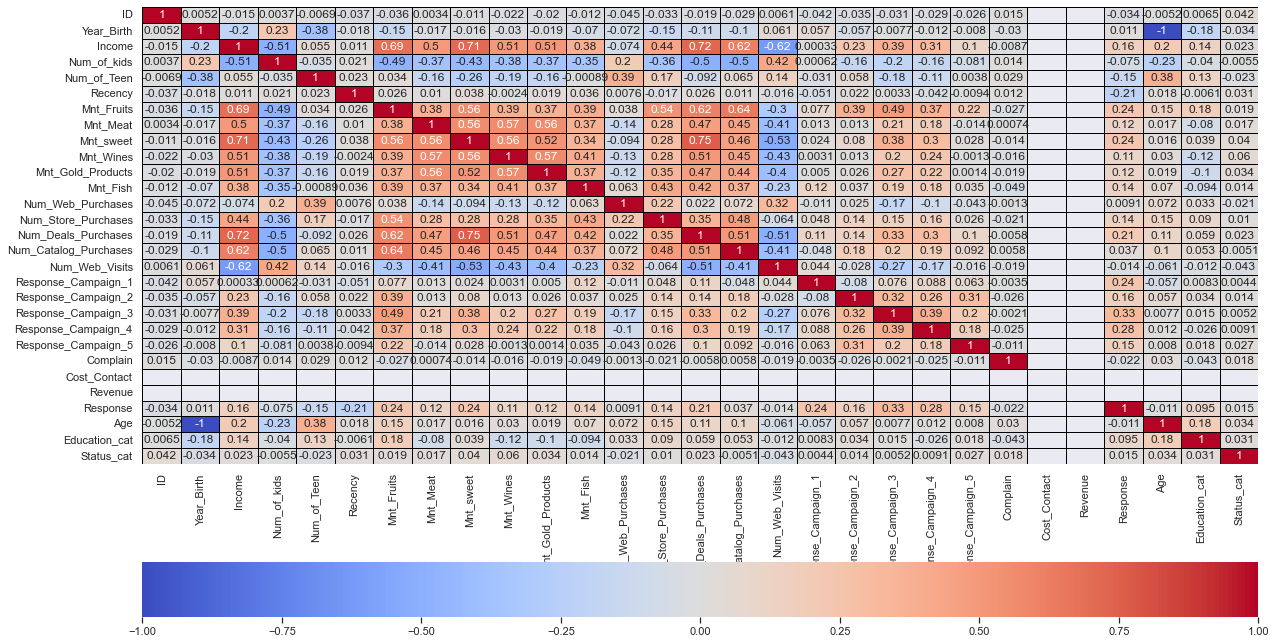

In [176]:
# heat map
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0,
            cmap= 'coolwarm', linewidths=0.7, linecolor='black', cbar_kws= {'orientation': 'horizontal'})

In [177]:
df[df.isnull().sum(axis=1)>2]

,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response,Age,Education_cat,Status_cat
502,5985,NaN,NaN,NaN,NaN,NaN,NaN,13/10/2012,0,80.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0,NaN,-1,-1
509,9699,NaN,NaN,NaN,NaN,NaN,NaN,21/12/2013,12,357.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0,NaN,-1,-1
634,2587,NaN,NaN,NaN,NaN,NaN,NaN,15/05/2014,21,14.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0,NaN,-1,-1
936,1544,NaN,NaN,NaN,NaN,NaN,NaN,22/12/2012,51,741.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0,NaN,-1,-1
1151,2431,NaN,NaN,NaN,NaN,NaN,NaN,31/12/2012,70,12.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0,NaN,-1,-1
1236,4587,NaN,Master,Widow,45006.0,0.0,0.0,18/07/2013,90,162.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0,NaN,3,5
1464,10451,NaN,NaN,NaN,NaN,NaN,NaN,12/03/2013,6,9.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0,NaN,-1,-1
1502,6437,NaN,NaN,NaN,NaN,NaN,NaN,19/06/2013,80,21.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0,NaN,-1,-1
1639,7627,NaN,NaN,NaN,NaN,NaN,NaN,12/12/2012,25,817.0,...,1.0,1.0,0.0,0.0,3.0,11.0,1,NaN,-1,-1


### more BOXPLOT

<AxesSubplot:xlabel='Status', ylabel='Age'>

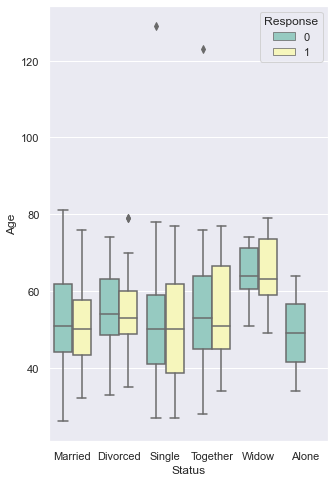

In [178]:
sns.set(rc={'figure.figsize':(5,8)})
sns.boxplot(y="Age", x="Status", hue= "Response", data=df, palette="Set3")

<AxesSubplot:xlabel='Education', ylabel='Income'>

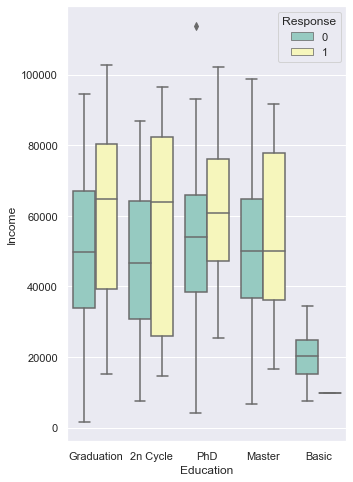

In [179]:
# sns.set(rc={'figure.figsize':(5,8)})
# sns.boxplot(y="Income", x="Education", hue= "Response", data=df, palette="Set3")
sns.set(rc={'figure.figsize':(5,8)})
sns.boxplot(y=income_under_150k, x="Education", hue= "Response", data=df, palette="Set3")

# Data Cleaning

### Pre- Processing

In [180]:
df[df.isnull().sum(axis=1)>2]

,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response,Age,Education_cat,Status_cat
502,5985,NaN,NaN,NaN,NaN,NaN,NaN,13/10/2012,0,80.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0,NaN,-1,-1
509,9699,NaN,NaN,NaN,NaN,NaN,NaN,21/12/2013,12,357.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0,NaN,-1,-1
634,2587,NaN,NaN,NaN,NaN,NaN,NaN,15/05/2014,21,14.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0,NaN,-1,-1
936,1544,NaN,NaN,NaN,NaN,NaN,NaN,22/12/2012,51,741.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0,NaN,-1,-1
1151,2431,NaN,NaN,NaN,NaN,NaN,NaN,31/12/2012,70,12.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0,NaN,-1,-1
1236,4587,NaN,Master,Widow,45006.0,0.0,0.0,18/07/2013,90,162.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0,NaN,3,5
1464,10451,NaN,NaN,NaN,NaN,NaN,NaN,12/03/2013,6,9.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0,NaN,-1,-1
1502,6437,NaN,NaN,NaN,NaN,NaN,NaN,19/06/2013,80,21.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0,NaN,-1,-1
1639,7627,NaN,NaN,NaN,NaN,NaN,NaN,12/12/2012,25,817.0,...,1.0,1.0,0.0,0.0,3.0,11.0,1,NaN,-1,-1


In [181]:
# df.info()

## need to fix
##### 1 INCOME\n
##### 2 Education
##### 3 Age
##### 4 Status
##### 5 Num_of_kids
##### 6 Num_of_teen
##### 7 Mnt_sweet
##### 8 Num_Web_Purchases      
##### 9 Response_Campaign_1    


In [182]:
df[nominal_data2.isnull().sum(axis=1)>4]

C:\Users\matane\AppData\Local\Temp\ipykernel_24420\3890082223.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[nominal_data2.isnull().sum(axis=1)>4]


,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response,Age,Education_cat,Status_cat


## מצאנו שיש פה 7 רשומות של אנשים שחסר להם את כל המידע על היענות לקמפיין ולכן החלטנו להוריד אותם - הורדנו כבר חזרה למעלה 

In [183]:
# # df.drop(df.index[-2])
# df2=df2.drop(df2.index[nominal_data2.isnull().sum(axis=1)>4])

In [184]:

df[df['Age'].isnull()==True]

,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response,Age,Education_cat,Status_cat
204,9204,NaN,Graduation,Widow,66731.0,0.0,1.0,12/09/2012,33,371.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0,NaN,2,5
211,702,NaN,2n Cycle,Widow,47682.0,0.0,1.0,15/02/2013,80,162.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0,NaN,0,5
335,9336,NaN,PhD,Widow,62187.0,0.0,1.0,22/03/2014,38,512.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0,NaN,4,5
346,6379,NaN,Master,Widow,47570.0,1.0,1.0,29/05/2013,3,67.0,...,0.0,0.0,0.0,0.0,3.0,11.0,1,NaN,3,5
465,6878,NaN,Graduation,Widow,27421.0,0.0,0.0,12/12/2012,14,43.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0,NaN,2,5
484,8842,NaN,Graduation,Widow,30372.0,1.0,1.0,25/12/2012,33,15.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0,NaN,2,5
502,5985,NaN,NaN,NaN,NaN,NaN,NaN,13/10/2012,0,80.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0,NaN,-1,-1
509,9699,NaN,NaN,NaN,NaN,NaN,NaN,21/12/2013,12,357.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0,NaN,-1,-1
630,8594,NaN,PhD,Widow,50520.0,0.0,1.0,28/01/2014,25,112.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0,NaN,4,5
634,2587,NaN,NaN,NaN,NaN,NaN,NaN,15/05/2014,21,14.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0,NaN,-1,-1


## search for coorrelation to fill the missing age

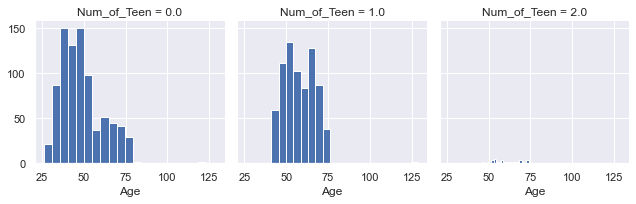

In [185]:
g = sns.FacetGrid(df, col='Num_of_Teen')
g.map(plt.hist, 'Age', bins=20);

In [186]:
for i in df['Num_of_Teen'].unique(): 
    df['Age'][df['Num_of_Teen']==i].median()
    print('For class ', i, ' the median is ', df.loc[df['Num_of_Teen']==i , 'Age'].median())
    print('and the number of missing values is ', df.loc[df['Num_of_Teen']==i , 'Age'].isnull().sum(), 
          'out of ',(df['Num_of_Teen']==i).sum(), 'rows')

For class  0.0  the median is  46.0
and the number of missing values is  10 out of  857 rows
For class  1.0  the median is  57.0
and the number of missing values is  11 out of  757 rows
For class  2.0  the median is  58.0
and the number of missing values is  0 out of  38 rows
For class  nan  the median is  nan
and the number of missing values is  0 out of  0 rows


In [187]:
df['Age_2'] = df['Age']
for i in [0.0,1.0]:
    df.loc[df['Num_of_Teen']==i , 'Age_2'] = df['Age_2'][df['Num_of_Teen']==i].fillna(value=df['Age_2'][df['Num_of_Teen']==i].median())
# df.info()
df[df['Age_2'].isnull()==True]

,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response,Age,Education_cat,Status_cat,Age_2
502,5985,NaN,NaN,NaN,NaN,NaN,NaN,13/10/2012,0,80.0,...,0.0,0.0,0.0,3.0,11.0,0,NaN,-1,-1,NaN
509,9699,NaN,NaN,NaN,NaN,NaN,NaN,21/12/2013,12,357.0,...,0.0,0.0,0.0,3.0,11.0,0,NaN,-1,-1,NaN
634,2587,NaN,NaN,NaN,NaN,NaN,NaN,15/05/2014,21,14.0,...,0.0,0.0,0.0,3.0,11.0,0,NaN,-1,-1,NaN
936,1544,NaN,NaN,NaN,NaN,NaN,NaN,22/12/2012,51,741.0,...,0.0,0.0,0.0,3.0,11.0,0,NaN,-1,-1,NaN
1151,2431,NaN,NaN,NaN,NaN,NaN,NaN,31/12/2012,70,12.0,...,0.0,0.0,0.0,3.0,11.0,0,NaN,-1,-1,NaN
1464,10451,NaN,NaN,NaN,NaN,NaN,NaN,12/03/2013,6,9.0,...,0.0,0.0,0.0,3.0,11.0,0,NaN,-1,-1,NaN
1502,6437,NaN,NaN,NaN,NaN,NaN,NaN,19/06/2013,80,21.0,...,0.0,0.0,0.0,3.0,11.0,0,NaN,-1,-1,NaN
1639,7627,NaN,NaN,NaN,NaN,NaN,NaN,12/12/2012,25,817.0,...,1.0,0.0,0.0,3.0,11.0,1,NaN,-1,-1,NaN


In [188]:
# נשאר עוד כמה אנשים ללא גיל -נמלא אותם בשכיח\ או ממוצע
mean_age = df['Age'].mean()
mean_age

52.9403530127815

In [189]:
df['Age_2'] = df['Age_2'].fillna(mean_age)


In [190]:
df[df['Education'].isnull()==True]

,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response,Age,Education_cat,Status_cat,Age_2
502,5985,NaN,NaN,NaN,NaN,NaN,NaN,13/10/2012,0,80.0,...,0.0,0.0,0.0,3.0,11.0,0,NaN,-1,-1,52.940353
509,9699,NaN,NaN,NaN,NaN,NaN,NaN,21/12/2013,12,357.0,...,0.0,0.0,0.0,3.0,11.0,0,NaN,-1,-1,52.940353
634,2587,NaN,NaN,NaN,NaN,NaN,NaN,15/05/2014,21,14.0,...,0.0,0.0,0.0,3.0,11.0,0,NaN,-1,-1,52.940353
936,1544,NaN,NaN,NaN,NaN,NaN,NaN,22/12/2012,51,741.0,...,0.0,0.0,0.0,3.0,11.0,0,NaN,-1,-1,52.940353
1151,2431,NaN,NaN,NaN,NaN,NaN,NaN,31/12/2012,70,12.0,...,0.0,0.0,0.0,3.0,11.0,0,NaN,-1,-1,52.940353
1464,10451,NaN,NaN,NaN,NaN,NaN,NaN,12/03/2013,6,9.0,...,0.0,0.0,0.0,3.0,11.0,0,NaN,-1,-1,52.940353
1502,6437,NaN,NaN,NaN,NaN,NaN,NaN,19/06/2013,80,21.0,...,0.0,0.0,0.0,3.0,11.0,0,NaN,-1,-1,52.940353
1639,7627,NaN,NaN,NaN,NaN,NaN,NaN,12/12/2012,25,817.0,...,1.0,0.0,0.0,3.0,11.0,1,NaN,-1,-1,52.940353


In [191]:
mode = df['Education'].mode()[0]
mode

'Graduation'

In [192]:
## ראינו שהשכיח זה פירות אבל חישפנו אולי קשר לעוד דבר (בסוך החלטנו למלא לפי השכיח וזהו)

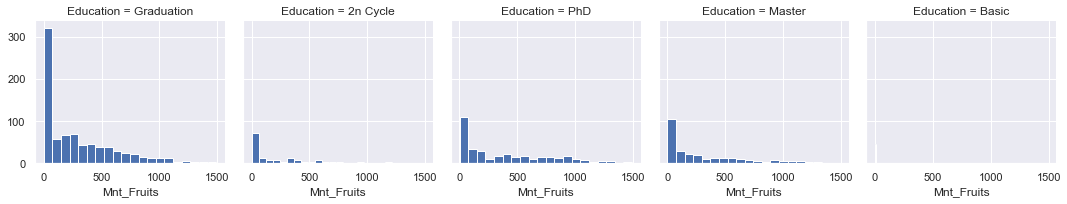

In [193]:
g = sns.FacetGrid(df, col='Education')
g.map(plt.hist, 'Mnt_Fruits', bins=20);

In [194]:
# for i in df['Education'].unique(): 
#     df['Mnt_Fruits'][df['Education']==i].median()
#     print('For class ', i, ' the median is ', df.loc[df['Education']==i , 'Mnt_Fruits'].median())
#     print('and the number of missing values is ', df.loc[df['Education']==i , 'Mnt_Fruits'].isnull().sum(), 
#           'out of ',(df['Education']==i).sum(), 'rows')

# כרגע למרות שיש קצר קשר בין פירות לבין חינוך המספרים נמוכים והעיקר בבוגרי תואר ראשון אז אמלא ככה את כולם 

In [195]:
df['Education_2'] = df['Education'].fillna(mode)


In [196]:
df[df['Education_2'].isnull()==True]
# df.info()

,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response,Age,Education_cat,Status_cat,Age_2,Education_2


## Now checek Status 

In [197]:
df[df['Status'].isnull()==True]
has_kids = df[df['Num_of_kids']>0]
fill = has_kids[has_kids['Status'].isnull()]
fill

,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response,Age,Education_cat,Status_cat,Age_2,Education_2
72,5552,1963.0,Master,NaN,48721.0,1.0,1.0,13/05/2013,50,81.0,...,0.0,0.0,3.0,11.0,0,59.0,3,-1,59.0,Master
363,10755,1976.0,2n Cycle,NaN,NaN,1.0,0.0,02/09/2013,76,6.0,...,0.0,0.0,3.0,11.0,0,46.0,0,-1,46.0,2n Cycle
555,2139,1975.0,Master,NaN,7500.0,1.0,0.0,02/10/2013,19,3.0,...,0.0,0.0,3.0,11.0,0,47.0,3,-1,47.0,Master
595,5342,1976.0,Basic,NaN,9548.0,1.0,0.0,08/08/2012,31,0.0,...,0.0,0.0,3.0,11.0,0,46.0,1,-1,46.0,Basic
693,1461,1965.0,PhD,NaN,36921.0,1.0,1.0,28/07/2013,74,17.0,...,0.0,0.0,3.0,11.0,0,57.0,4,-1,57.0,PhD
830,6182,1984.0,Graduation,NaN,26646.0,1.0,0.0,10/02/2014,26,11.0,...,0.0,0.0,3.0,11.0,0,38.0,2,-1,38.0,Graduation
1124,5899,1950.0,PhD,NaN,5648.0,1.0,1.0,13/03/2014,68,28.0,...,0.0,0.0,3.0,11.0,0,72.0,4,-1,72.0,PhD
1405,7386,1976.0,Graduation,NaN,30992.0,1.0,0.0,22/04/2013,83,17.0,...,0.0,0.0,3.0,11.0,0,46.0,2,-1,46.0,Graduation
1552,4855,1974.0,PhD,NaN,30351.0,1.0,0.0,06/06/2013,19,14.0,...,0.0,0.0,3.0,11.0,1,48.0,4,-1,48.0,PhD


In [198]:
## ERROR איך למלא עמודות שבהם יש רק ילדים להפוך להיות נשואים בסטטוס

In [199]:
mode = df['Status'].mode()[0]
mode
df['Status'] = df['Status'].fillna(mode)

In [200]:
df[df['Status'].isnull()==True]

,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response,Age,Education_cat,Status_cat,Age_2,Education_2


In [201]:
# אחרי טיפול בטטסוס חסר
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1672 entries, 0 to 1679
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1672 non-null   int64  
 1   Year_Birth             1643 non-null   float64
 2   Education              1664 non-null   object 
 3   Status                 1672 non-null   object 
 4   Income                 1601 non-null   float64
 5   Num_of_kids            1664 non-null   float64
 6   Num_of_Teen            1652 non-null   float64
 7   Registration_date      1672 non-null   object 
 8   Recency                1672 non-null   int64  
 9   Mnt_Fruits             1672 non-null   float64
 10  Mnt_Meat               1672 non-null   float64
 11  Mnt_sweet              1658 non-null   float64
 12  Mnt_Wines              1672 non-null   float64
 13  Mnt_Gold_Products      1672 non-null   float64
 14  Mnt_Fish               1672 non-null   float64
 15  Num_

In [202]:
# g = sns.FacetGrid(df, col='Status')
# g.map(plt.hist, 'Age', bins=20);
# # not help

## fix the missing Num_Web_Purchases

In [203]:
df[df['Num_Web_Purchases'].isnull()==True]

,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response,Age,Education_cat,Status_cat,Age_2,Education_2
1651,4119,1963.0,Master,Together,38620.0,0.0,0.0,11/05/2013,56,112.0,...,0.0,0.0,3.0,11.0,0,59.0,3,4,59.0,Master
1652,9743,1955.0,Graduation,Married,76998.0,0.0,1.0,11/01/2013,85,1449.0,...,0.0,0.0,3.0,11.0,0,67.0,2,2,67.0,Graduation
1653,5300,1973.0,Master,Married,38961.0,1.0,0.0,30/12/2013,60,19.0,...,0.0,0.0,3.0,11.0,0,49.0,3,2,49.0,Master
1654,851,1972.0,Master,Married,57136.0,1.0,1.0,09/07/2013,48,306.0,...,0.0,0.0,3.0,11.0,0,50.0,3,2,50.0,Master
1655,569,1991.0,Graduation,Single,90273.0,0.0,0.0,14/12/2013,32,704.0,...,0.0,0.0,3.0,11.0,1,31.0,2,3,31.0,Graduation
1656,7712,1946.0,PhD,Single,62159.0,0.0,0.0,28/04/2014,68,182.0,...,0.0,0.0,3.0,11.0,0,76.0,4,3,76.0,PhD
1657,8093,1969.0,Master,Married,79734.0,0.0,0.0,28/06/2014,72,572.0,...,0.0,0.0,3.0,11.0,0,53.0,3,2,53.0,Master
1658,5117,1963.0,2n Cycle,Married,32632.0,0.0,0.0,02/08/2012,32,63.0,...,0.0,0.0,3.0,11.0,0,59.0,0,2,59.0,2n Cycle
1660,1291,1978.0,PhD,Together,27683.0,1.0,0.0,04/08/2012,90,152.0,...,0.0,0.0,3.0,11.0,0,44.0,4,4,44.0,PhD
1661,7723,1979.0,Graduation,Together,75507.0,0.0,0.0,02/05/2014,56,709.0,...,0.0,0.0,3.0,11.0,0,43.0,2,4,43.0,Graduation


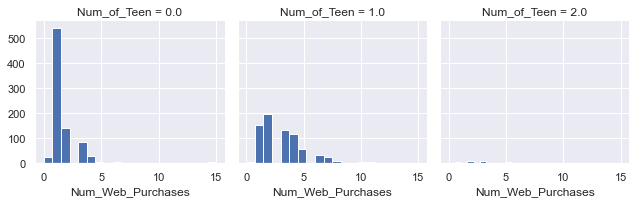

In [204]:
g = sns.FacetGrid(df, col='Num_of_Teen')
g.map(plt.hist, 'Num_Web_Purchases', bins=20);

In [205]:
for i in df['Num_of_Teen'].unique(): 
    df['Num_Web_Purchases'][df['Num_of_Teen']==i].median()
    print('For class ', i, ' the median is ', df.loc[df['Num_of_Teen']==i , 'Num_Web_Purchases'].median())
    print('and the number of missing values is ', df.loc[df['Num_of_Teen']==i , 'Num_Web_Purchases'].isnull().sum(), 
          'out of ',(df['Num_of_Teen']==i).sum(), 'rows')

For class  0.0  the median is  1.0
and the number of missing values is  11 out of  857 rows
For class  1.0  the median is  3.0
and the number of missing values is  11 out of  757 rows
For class  2.0  the median is  3.0
and the number of missing values is  0 out of  38 rows
For class  nan  the median is  nan
and the number of missing values is  0 out of  0 rows


In [206]:

for i in [0.0,1.0]:
    df.loc[df['Num_of_Teen']==i , 'Num_Web_Purchases'] = df['Num_Web_Purchases'][df['Num_of_Teen']==i].fillna(value=df['Num_Web_Purchases'][df['Num_of_Teen']==i].median())
# df.info()
df[df['Num_Web_Purchases'].isnull()==True]

,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response,Age,Education_cat,Status_cat,Age_2,Education_2


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1672 entries, 0 to 1679
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1672 non-null   int64  
 1   Year_Birth             1643 non-null   float64
 2   Education              1664 non-null   object 
 3   Status                 1672 non-null   object 
 4   Income                 1601 non-null   float64
 5   Num_of_kids            1664 non-null   float64
 6   Num_of_Teen            1652 non-null   float64
 7   Registration_date      1672 non-null   object 
 8   Recency                1672 non-null   int64  
 9   Mnt_Fruits             1672 non-null   float64
 10  Mnt_Meat               1672 non-null   float64
 11  Mnt_sweet              1658 non-null   float64
 12  Mnt_Wines              1672 non-null   float64
 13  Mnt_Gold_Products      1672 non-null   float64
 14  Mnt_Fish               1672 non-null   float64
 15  Num_

## Now checek Income 

In [208]:
df[df['Income'].isnull()==True]

,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response,Age,Education_cat,Status_cat,Age_2,Education_2
0,5376,1979.0,Graduation,Married,NaN,1.0,0.0,06/01/2013,42,1.0,...,0.0,0.0,3.0,11.0,0,43.0,2,2,43.000000,Graduation
10,2408,1976.0,Graduation,Married,NaN,1.0,1.0,20/11/2012,20,490.0,...,0.0,0.0,3.0,11.0,0,46.0,2,2,46.000000,Graduation
93,2863,1970.0,Graduation,Single,NaN,1.0,2.0,23/08/2013,67,738.0,...,0.0,0.0,3.0,11.0,0,52.0,2,3,52.000000,Graduation
142,5909,1964.0,Graduation,Married,NaN,0.0,1.0,19/09/2013,25,895.0,...,0.0,0.0,3.0,11.0,0,58.0,2,2,58.000000,Graduation
297,5370,1973.0,PhD,Married,NaN,1.0,0.0,16/01/2013,38,239.0,...,0.0,0.0,3.0,11.0,0,49.0,4,2,49.000000,PhD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,2471,1965.0,Graduation,Married,NaN,0.0,0.0,27/06/2014,39,48.0,...,0.0,0.0,3.0,11.0,0,57.0,2,2,57.000000,Graduation
1562,3749,1973.0,Graduation,Together,NaN,0.0,0.0,02/03/2013,54,627.0,...,0.0,0.0,3.0,11.0,0,49.0,2,4,49.000000,Graduation
1639,7627,NaN,NaN,Married,NaN,NaN,NaN,12/12/2012,25,817.0,...,0.0,0.0,3.0,11.0,1,NaN,-1,-1,52.940353,Graduation
1649,5255,1986.0,Graduation,Single,NaN,1.0,0.0,20/02/2013,19,5.0,...,0.0,0.0,3.0,11.0,0,36.0,2,3,36.000000,Graduation


#### income has correltaion with: Num Deals Purchases , Mnt Sweet, Mnt_fruit
##### try to look on crr with sweet

In [209]:
# g = sns.FacetGrid(df, col='Income')
# g.map(plt.hist, 'Mnt_Sweet', bins=20);

In [210]:
df[df.isnull().sum(axis=1)>3]

,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response,Age,Education_cat,Status_cat,Age_2,Education_2
502,5985,NaN,NaN,Married,NaN,NaN,NaN,13/10/2012,0,80.0,...,0.0,0.0,3.0,11.0,0,NaN,-1,-1,52.940353,Graduation
509,9699,NaN,NaN,Married,NaN,NaN,NaN,21/12/2013,12,357.0,...,0.0,0.0,3.0,11.0,0,NaN,-1,-1,52.940353,Graduation
634,2587,NaN,NaN,Married,NaN,NaN,NaN,15/05/2014,21,14.0,...,0.0,0.0,3.0,11.0,0,NaN,-1,-1,52.940353,Graduation
936,1544,NaN,NaN,Married,NaN,NaN,NaN,22/12/2012,51,741.0,...,0.0,0.0,3.0,11.0,0,NaN,-1,-1,52.940353,Graduation
1151,2431,NaN,NaN,Married,NaN,NaN,NaN,31/12/2012,70,12.0,...,0.0,0.0,3.0,11.0,0,NaN,-1,-1,52.940353,Graduation
1464,10451,NaN,NaN,Married,NaN,NaN,NaN,12/03/2013,6,9.0,...,0.0,0.0,3.0,11.0,0,NaN,-1,-1,52.940353,Graduation
1502,6437,NaN,NaN,Married,NaN,NaN,NaN,19/06/2013,80,21.0,...,0.0,0.0,3.0,11.0,0,NaN,-1,-1,52.940353,Graduation
1639,7627,NaN,NaN,Married,NaN,NaN,NaN,12/12/2012,25,817.0,...,0.0,0.0,3.0,11.0,1,NaN,-1,-1,52.940353,Graduation


In [211]:
# יש לי חשש שאולי הערך

In [212]:
# df[df['Status'].isnull()==True]

In [213]:
# df[df['Year_Birth'].isnull()==True]

In [214]:
# ילדים ומתגברים לא חסר הרבה נשלים לפי הרוב 
mode = df['Num_of_kids'].mode()[0]
mode
df['Num_of_kids'] = df['Num_of_kids'].fillna(mode)

In [215]:
# ילדים ומתגברים לא חסר הרבה נשלים לפי הרוב 
mode = df['Num_of_Teen'].mode()[0]
mode
df['Num_of_Teen'] = df['Num_of_Teen'].fillna(mode)

In [216]:

# # data = df.drop(['ID','Response'], axis = 1)
# df = df.drop(['Education','Age','Year_Birth'], axis = 1)


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1672 entries, 0 to 1679
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1672 non-null   int64  
 1   Year_Birth             1643 non-null   float64
 2   Education              1664 non-null   object 
 3   Status                 1672 non-null   object 
 4   Income                 1601 non-null   float64
 5   Num_of_kids            1672 non-null   float64
 6   Num_of_Teen            1672 non-null   float64
 7   Registration_date      1672 non-null   object 
 8   Recency                1672 non-null   int64  
 9   Mnt_Fruits             1672 non-null   float64
 10  Mnt_Meat               1672 non-null   float64
 11  Mnt_sweet              1658 non-null   float64
 12  Mnt_Wines              1672 non-null   float64
 13  Mnt_Gold_Products      1672 non-null   float64
 14  Mnt_Fish               1672 non-null   float64
 15  Num_

## Now checek Income 
For Income we will generate random values from a similar distribution. (there are some connection but to do somthing else)

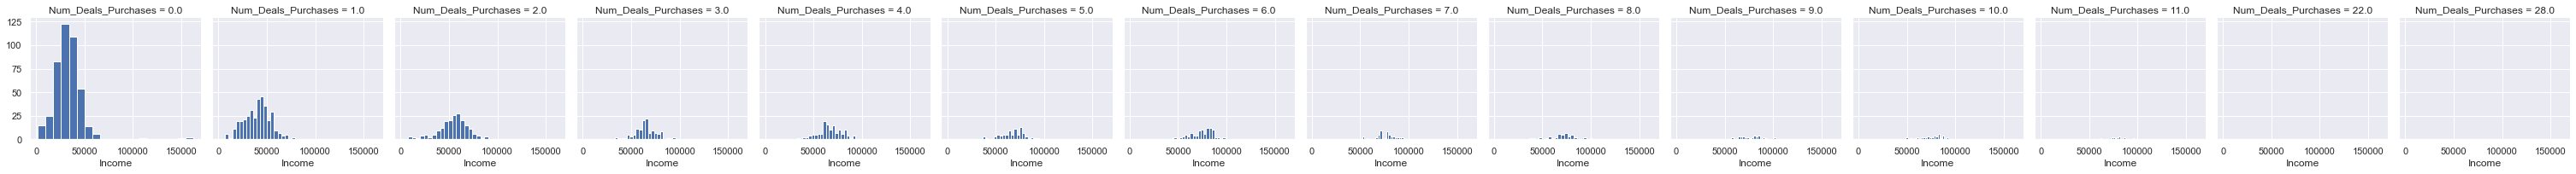

In [218]:
g = sns.FacetGrid(df, col='Num_Deals_Purchases')
g.map(plt.hist, 'Income', bins=20);

In [219]:
for i in df['Num_Deals_Purchases'].unique(): 
    df['Income'][df['Num_Deals_Purchases']==i].median()
    print('For class ', i, ' the median is ', df.loc[df['Num_Deals_Purchases']==i , 'Income'].median())
    print('and the number of missing values is ', df.loc[df['Num_Deals_Purchases']==i , 'Income'].isnull().sum(), 
          'out of ',(df['Num_Deals_Purchases']==i).sum(), 'rows')

For class  28.0  the median is  158974.5
and the number of missing values is  1 out of  3 rows
For class  0.0  the median is  31788.0
and the number of missing values is  23 out of  456 rows
For class  1.0  the median is  41658.0
and the number of missing values is  17 out of  374 rows
For class  6.0  the median is  75739.5
and the number of missing values is  3 out of  99 rows
For class  22.0  the median is  157243.0
and the number of missing values is  0 out of  1 rows
For class  2.0  the median is  55707.0
and the number of missing values is  7 out of  202 rows
For class  4.0  the median is  66303.0
and the number of missing values is  4 out of  137 rows
For class  3.0  the median is  64340.0
and the number of missing values is  4 out of  126 rows
For class  5.0  the median is  69556.0
and the number of missing values is  6 out of  90 rows
For class  9.0  the median is  79416.0
and the number of missing values is  2 out of  36 rows
For class  8.0  the median is  71939.0
and the numb

In [220]:
for i in [0,1,2,3,4,5,6,7,9,11,28]:
    df.loc[df['Num_Deals_Purchases']==i , 'Income'] = df['Income'][df['Num_Deals_Purchases']==i].fillna(value=df['Income'][df['Num_Deals_Purchases']==i].median())
# df.info()
df[df['Income'].isnull()==True]


,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response,Age,Education_cat,Status_cat,Age_2,Education_2


## fix missinig on swets and cmapign 1

In [221]:
mean_sweet = df['Mnt_sweet'].mean()
mean_sweet
df['Mnt_sweet'] = df['Mnt_sweet'].fillna(mean_sweet)


In [222]:
mode = df['Response_Campaign_1'].mode()[0]
df['Response_Campaign_1'] = df['Response_Campaign_1'].fillna(mode)


### שכחנו לבצע להעביר אחורה - המידע על
### COST_contct and revenu are meeaning less casue they are contant

In [223]:
#df = df.drop(['Revenue','Revenue'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1672 entries, 0 to 1679
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1672 non-null   int64  
 1   Year_Birth             1643 non-null   float64
 2   Education              1664 non-null   object 
 3   Status                 1672 non-null   object 
 4   Income                 1672 non-null   float64
 5   Num_of_kids            1672 non-null   float64
 6   Num_of_Teen            1672 non-null   float64
 7   Registration_date      1672 non-null   object 
 8   Recency                1672 non-null   int64  
 9   Mnt_Fruits             1672 non-null   float64
 10  Mnt_Meat               1672 non-null   float64
 11  Mnt_sweet              1672 non-null   float64
 12  Mnt_Wines              1672 non-null   float64
 13  Mnt_Gold_Products      1672 non-null   float64
 14  Mnt_Fish               1672 non-null   float64
 15  Num_

### Normalization
- Min-max 


It is important to notice that new data (e.g. test data) is normalized by the same scale.

#### Min-Max normalization
Change the data to be with values between 0 to 1.

In [224]:
scaler = MinMaxScaler()
for i in ['Response','Age','Income','Mnt_Fruits','Mnt_Meat','Mnt_sweet','Mnt_Fish','Mnt_Gold_Products','Mnt_Wines']:
    i2 = str(i) + "_norm"
    scaler.fit(pd.DataFrame(df[i]))
    df[i2] = scaler.transform(pd.DataFrame(df[i])).astype(np.float64)
    print(scaler.data_min_)
    print(scaler.data_max_)
    df[[i,i2]].head()

df.head()

[0.]
[1.]
[26.]
[129.]
[1730.]
[162397.]
[0.]
[1493.]
[0.]
[199.]
[1.]
[1725.]
[0.]
[362.]
[0.]
[263.]
[0.]
[259.]


,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Education_2,Response_norm,Age_norm,Income_norm,Mnt_Fruits_norm,Mnt_Meat_norm,Mnt_sweet_norm,Mnt_Fish_norm,Mnt_Gold_Products_norm,Mnt_Wines_norm
0,5376,1979.0,Graduation,Married,158974.5,1.0,0.0,06/01/2013,42,1.0,...,Graduation,0.0,0.165049,0.978698,0.000670,0.005025,1.000000,0.002762,0.003802,0.003861
1,6862,1971.0,Graduation,Divorced,1730.0,0.0,0.0,18/05/2014,65,1.0,...,Graduation,0.0,0.242718,0.000000,0.000670,0.005025,0.001160,0.002762,0.003802,0.003861
2,10749,1991.0,Graduation,Single,8028.0,0.0,0.0,18/09/2012,62,73.0,...,Graduation,0.0,0.048544,0.039199,0.048895,0.090452,0.037703,0.005525,0.045627,0.027027
3,238,1967.0,2n Cycle,Together,67309.0,1.0,1.0,23/01/2013,76,515.0,...,2n Cycle,0.0,0.281553,0.408167,0.344943,0.236181,0.104408,0.262431,0.361217,0.575290
4,1501,1982.0,PhD,Married,160803.0,0.0,0.0,04/08/2012,21,55.0,...,PhD,0.0,0.135922,0.990079,0.036839,0.080402,0.940255,0.011050,0.011407,0.065637


## עד כאן סיימנו לנקות מידע 

## DATA REDUCTION
## PCA

In [225]:
# before make sure all value are numeric, notice that the Education_2, Status, go back to Object after we fiilna them
# and to take care of the Registeration date

In [226]:
df['Education_2'] = df['Education_2'].astype('category').cat.codes
df['Status'] = df['Status'].astype('category').cat.codes

In [227]:
df[['Registration_date_day', 'Registration_date_month', 'Registration_date_year']] = df['Registration_date'].str.split('/', expand=True)
df['Registration_date_day'] = df['Registration_date_day'].astype(float)
df['Registration_date_month'] = df['Registration_date_month'].astype(float)
df['Registration_date_year'] = df['Registration_date_year'].astype(float)
df= df.drop(['Registration_date'], axis=1)
df.head()

,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Recency,Mnt_Fruits,Mnt_Meat,...,Income_norm,Mnt_Fruits_norm,Mnt_Meat_norm,Mnt_sweet_norm,Mnt_Fish_norm,Mnt_Gold_Products_norm,Mnt_Wines_norm,Registration_date_day,Registration_date_month,Registration_date_year
0,5376,1979.0,Graduation,2,158974.5,1.0,0.0,42,1.0,1.0,...,0.978698,0.000670,0.005025,1.000000,0.002762,0.003802,0.003861,6.0,1.0,2013.0
1,6862,1971.0,Graduation,1,1730.0,0.0,0.0,65,1.0,1.0,...,0.000000,0.000670,0.005025,0.001160,0.002762,0.003802,0.003861,18.0,5.0,2014.0
2,10749,1991.0,Graduation,3,8028.0,0.0,0.0,62,73.0,18.0,...,0.039199,0.048895,0.090452,0.037703,0.005525,0.045627,0.027027,18.0,9.0,2012.0
3,238,1967.0,2n Cycle,4,67309.0,1.0,1.0,76,515.0,47.0,...,0.408167,0.344943,0.236181,0.104408,0.262431,0.361217,0.575290,23.0,1.0,2013.0
4,1501,1982.0,PhD,2,160803.0,0.0,0.0,21,55.0,16.0,...,0.990079,0.036839,0.080402,0.940255,0.011050,0.011407,0.065637,4.0,8.0,2012.0


In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1672 entries, 0 to 1679
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1672 non-null   int64  
 1   Year_Birth               1643 non-null   float64
 2   Education                1664 non-null   object 
 3   Status                   1672 non-null   int8   
 4   Income                   1672 non-null   float64
 5   Num_of_kids              1672 non-null   float64
 6   Num_of_Teen              1672 non-null   float64
 7   Recency                  1672 non-null   int64  
 8   Mnt_Fruits               1672 non-null   float64
 9   Mnt_Meat                 1672 non-null   float64
 10  Mnt_sweet                1672 non-null   float64
 11  Mnt_Wines                1672 non-null   float64
 12  Mnt_Gold_Products        1672 non-null   float64
 13  Mnt_Fish                 1672 non-null   float64
 14  Num_Web_Purchases       

<AxesSubplot:xlabel='Registration_date_month', ylabel='count'>

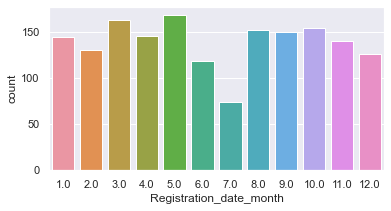

In [229]:
plt.figure(figsize=(6,3))
sns.countplot(x=df['Registration_date_month'],data=df)

Apply PCA - 
first: copy carefully the origin df to df2

In [230]:
# deep copy
# df2 = df.copy(deep=True)

df1 = df[['Response','Age_norm','Income_norm','Mnt_Fruits_norm','Mnt_Meat_norm','Mnt_sweet_norm','Mnt_Fish_norm','Mnt_Gold_Products_norm','Mnt_Wines_norm']]


In [231]:
mean_age = df1['Age_norm'].mean()
mean_age
df1['Age_norm'] = df1['Age_norm'].fillna(mean_age)

C:\Users\matane\AppData\Local\Temp\ipykernel_24420\1435909171.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Age_norm'] = df1['Age_norm'].fillna(mean_age)


In [232]:
df1.isnull().sum(axis =0)

Response                  0
Age_norm                  0
Income_norm               0
Mnt_Fruits_norm           0
Mnt_Meat_norm             0
Mnt_sweet_norm            0
Mnt_Fish_norm             0
Mnt_Gold_Products_norm    0
Mnt_Wines_norm            0
dtype: int64

In [233]:
pca = PCA(n_components = 0.999, svd_solver = 'full')

NameError: name 'PCA' is not defined

In [ ]:
pca.fit(df1, y='Response')
df2 = pd.DataFrame(pca.transform(df1))

In [ ]:
pca.explained_variance_ratio_

In [ ]:
colordict = {0: 'red', 1: 'blue'}
plt.scatter(df2[0], df2[1], c = df['Response'].map(colordict))

### Discretization
- Equal-width partitioning
- Equal-depth partitioning
- Another reasoning partitioning 

#### Equal-width
$W = \frac{(B –A)}{N}$

In [ ]:
A = df['Age_2'].min()
B = df['Age_2'].max()
N = 5
W = np.round((B - A)/N)
W

In [ ]:
df.loc[ df['Age_2'] <= W, 'Age_bin'] = 0
df.loc[(df['Age_2'] > W) & (df['Age_2'] <= 2*W), 'Age_bin'] = 1
df.loc[(df['Age_2'] > 2*W) & (df['Age_2'] <= 3*W), 'Age_bin'] = 2
df.loc[(df['Age_2'] > 3*W) & (df['Age_2'] <= 4*W), 'Age_bin'] = 3
df.loc[ df['Age_2'] > 4*W, 'Age_bin'] = 4

In [ ]:
df['Age_bin'].value_counts()

In [ ]:
sns.displot(df['Age_2'], kde=True, color='skyblue', stat="probability", discrete=True )

#### Reasoning partition
By age groups

In [ ]:
df.loc[ df['Age_2'] <= 10, 'Age_bin2'] = 0-10
df.loc[(df['Age_2'] > 20) & (df['Age_2'] <= 30), 'Age_bin2'] = 20
df.loc[(df['Age_2'] > 30) & (df['Age_2'] <= 40), 'Age_bin2'] = 30
df.loc[(df['Age_2'] > 40) & (df['Age_2'] <= 50), 'Age_bin2'] = 40
df.loc[(df['Age_2'] > 50) & (df['Age_2'] <= 60), 'Age_bin2'] = 50
df.loc[ df['Age_2'] > 60, 'Age_bin2'] = 5

In [ ]:
df['Age_bin2'].value_counts()